# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning** 
3. **Exploratory Data Analysis (EDA)** 
4. **Data Pre-processing**
5. **Feature Engineering**
6. **Model Training, Hyper-Tuning parameters and Evaluation**
7. **Conclusions**



# Load Dataset

In [1]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [2]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


# Data Cleaning

In this part we are going to:

- **Handling missing values**: I will identify columns with missing values and decide how to handle them, for example by deleting rows, filling with the mean or median, or using more advanced imputation methods.
- **Removing outliers**: I will use statistical methods to identify and remove outliers that could distort the analysis.
- **Coding of categorical variables**: I will transform the categorical variables into a format that can be used for analysis, for example using one-hot coding or label coding.
- **Data normalization**: If necessary, I will normalize the data to bring all variables to a common scale. 

In [35]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 16 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


In [4]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [6]:
data_full['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [7]:
data_full['contact'].value_counts()

print()

In [8]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


We investigate the dataset with some statistics:

In [9]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [10]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop it.

In [11]:
data_full = data_full.drop(['pdays'], axis=1)
data_full.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Exploratory Data Analysis (EDA)

- **Univariate analysis**: I will examine the distribution of each variable, for example using histograms or box plots.
- **Bivariate analysis**: I will examine relationships between pairs of variables, for example using scatter plots or calculating correlation coefficients.
- **Multivariate analysis**: I will examine relationships between multiple variables, for example using correlation matrices or dimensionality reduction techniques such as principal component analysis (PCA).

First, we analyse the variable to predict, which is the column y (if the client will subscribe a term deposit or not). We can see if the problem is balanced. This will affect how we evaluate the models.

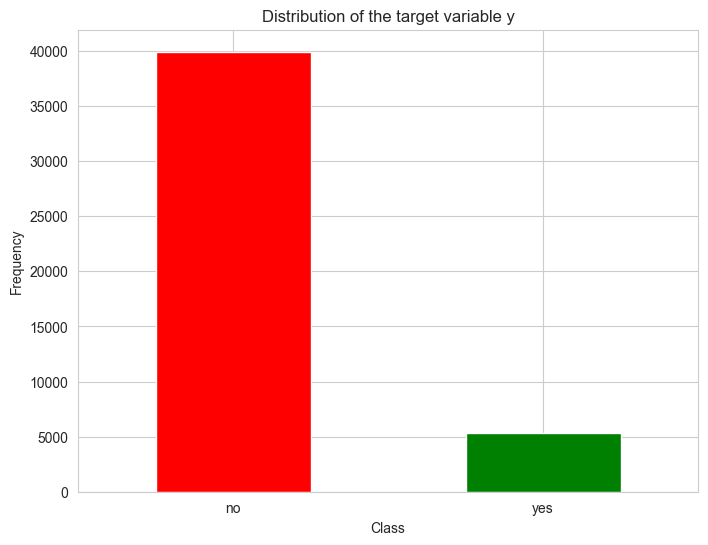

In [12]:
# frequency
y_counts = data_full['y'].value_counts()

# bar plt graph
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of the target variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


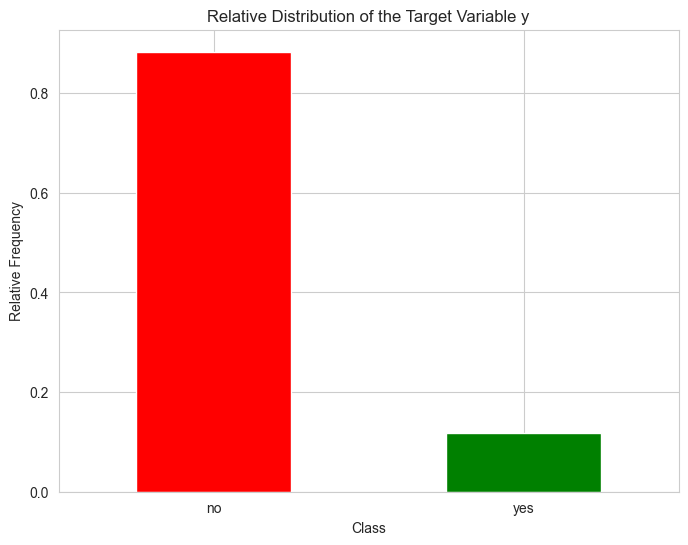

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [13]:
# Calculate the relative frequency of the target variable 'y'
y_relative_frequency = data_full['y'].value_counts(normalize=True)

# Plotting the relative frequency as a bar plot
plt.figure(figsize=(8, 6))
y_relative_frequency.plot(kind='bar', color=['red', 'green'])
plt.title('Relative Distribution of the Target Variable y')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

y_relative_frequency

We perfomed an univariate analysis of the target variable y (Graph 1). We can see that the dataset is unbalanced. The variable y has more or less *40.000* instances of the class 'no' and *5.000* instances of the class 'yes'. This is a problem because the model will be biased towards the class 'no' and it will not be able to predict the class 'yes' correctly.

From this graph we can see a relative frequency of *88.3%* of the class 'no' and only *11.7%* of the class 'yes'. So the dataset is imbalanced.

So we know that we need to use stratified cross-validation, using the *StratifiedKFold* class from the *sklearn.model_selection* module.

In this way we split the data such that the proportion between classes are the same in each fold as they are in the whole dataset.



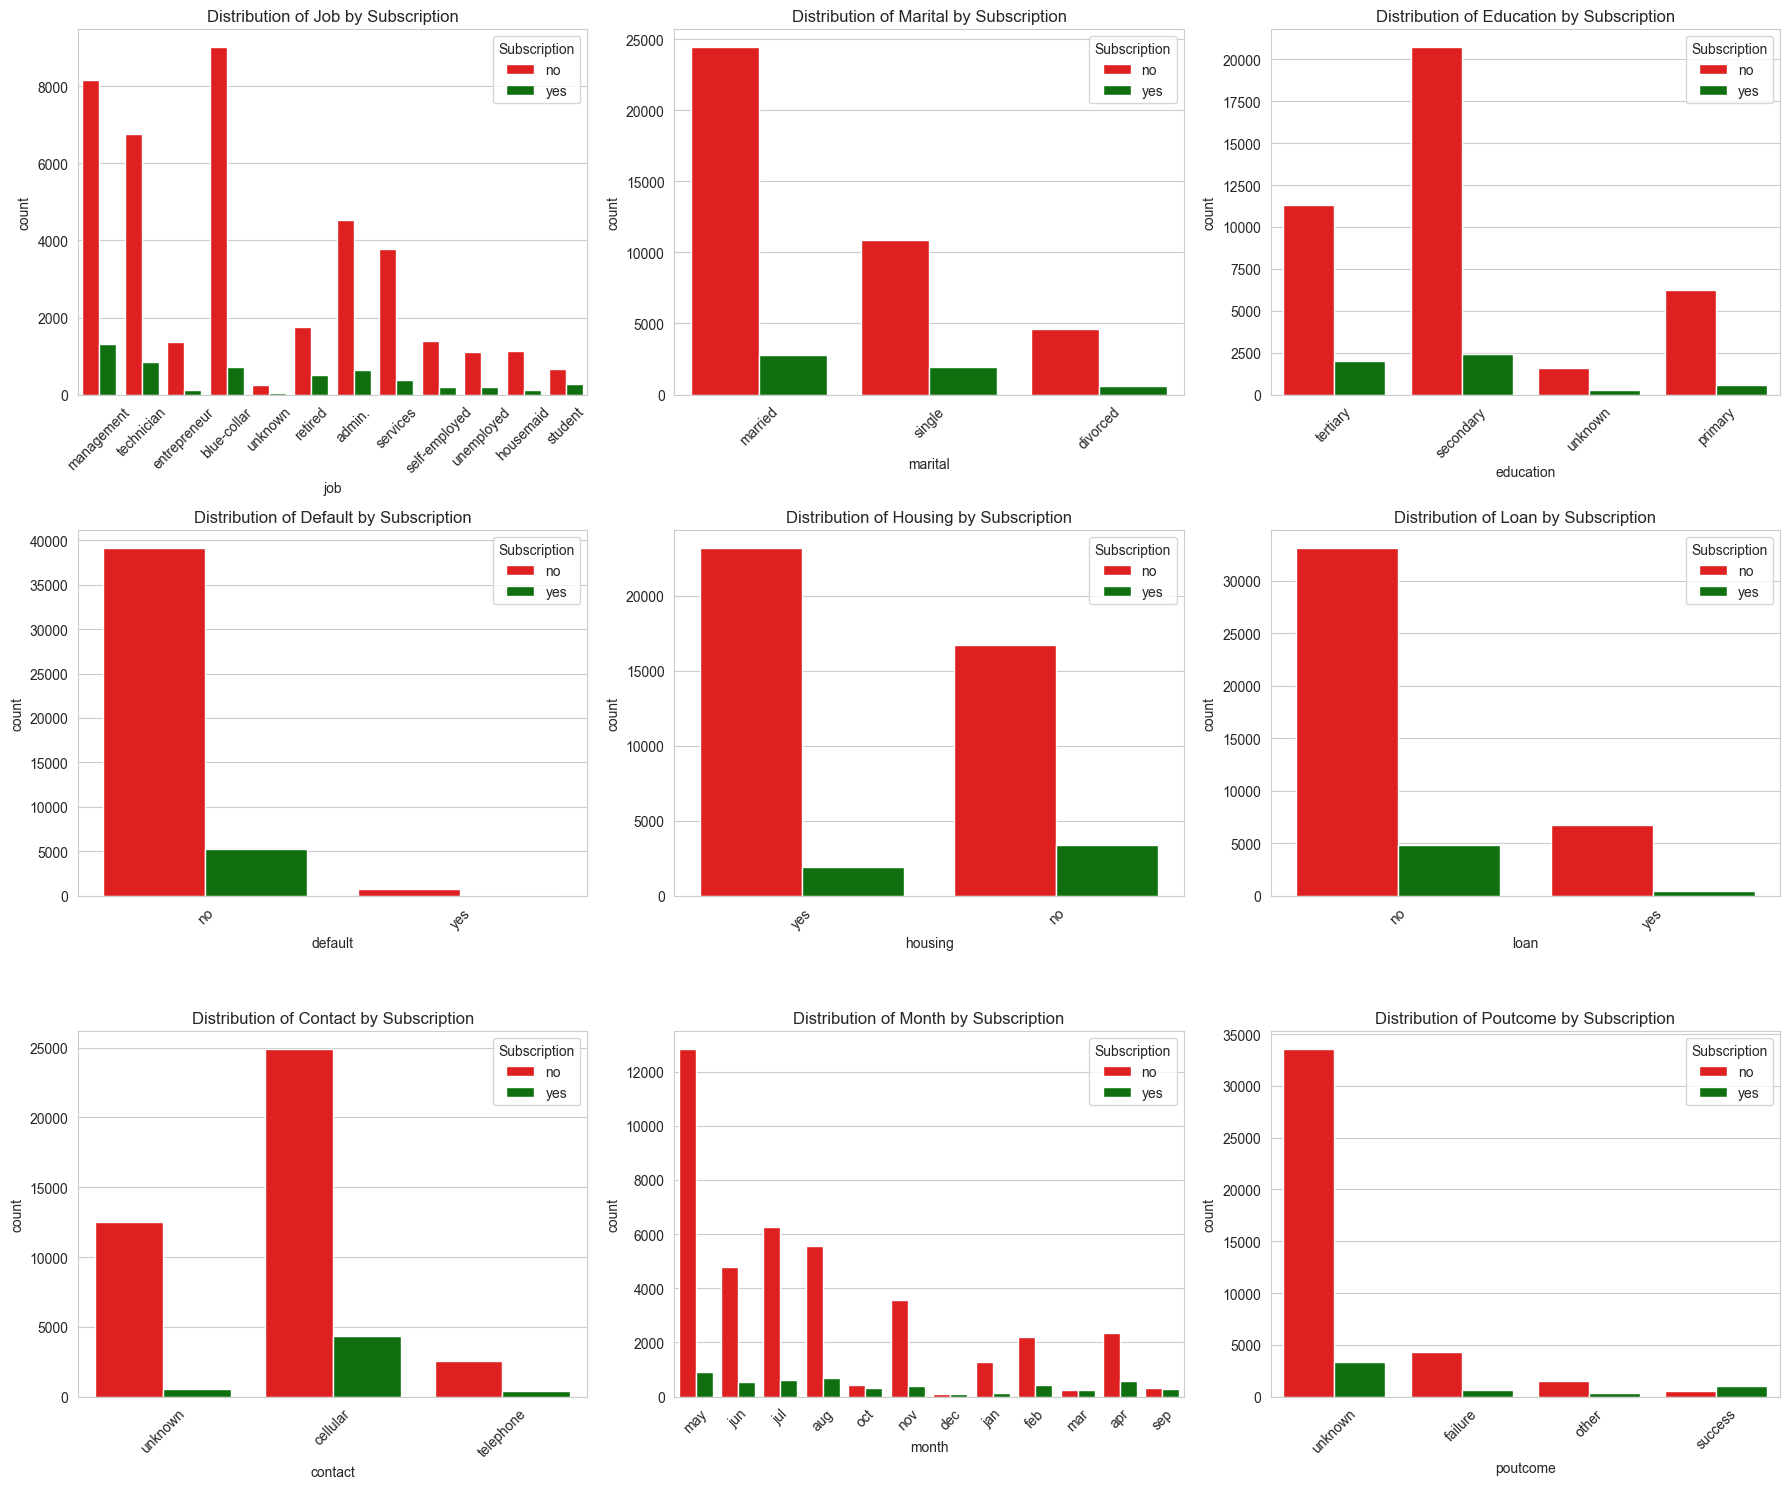

In [14]:
# Visualizing the distribution of categorical variables with respect to the target variable 'y'

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=data_full, x=var, hue='y', ax=axs[row, col], palette=['red', 'green'])
    axs[row, col].set_title(f'Distribution of {var.capitalize()} by Subscription')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend(title='Subscription', loc='upper right')

fig.tight_layout()
plt.show()


 Here we can have a broader analysis among the categorical varible of the Dataset data_full. 

to drop:

- poutcome -> reason: missing values "unknown"
- contact -> reason: missing values "unknown"

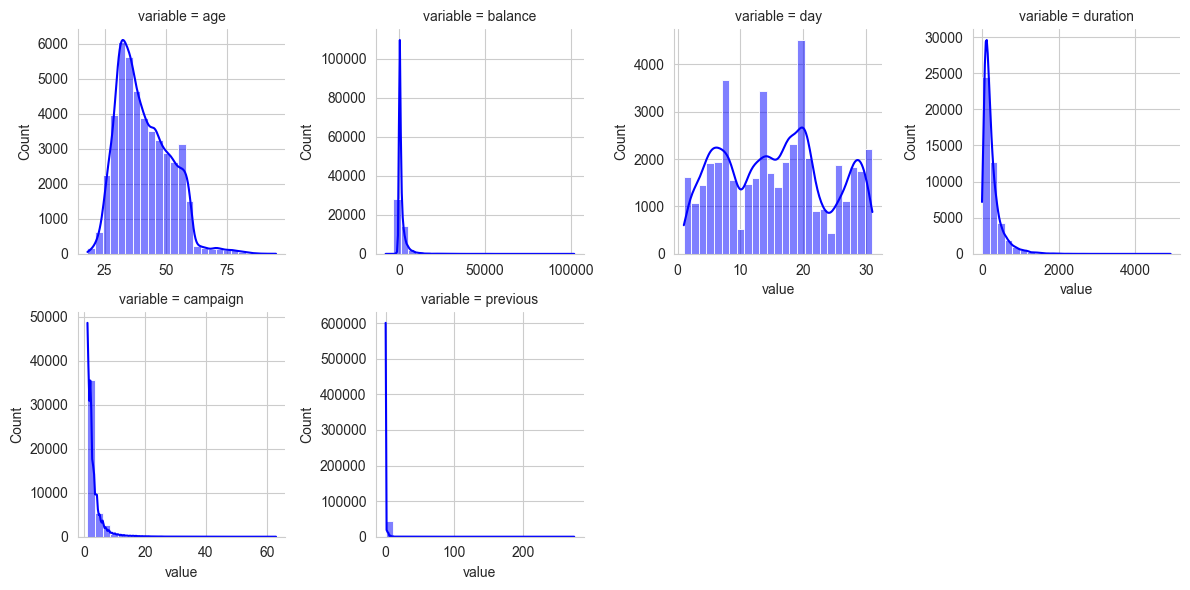

In [15]:
# Create a dataframe with only the numerical variables
data_num = data_full.select_dtypes(include=['int64', 'float64'])
# Melt the data into a long format so that I can plot the distribution of all numerical variables
pd.melt(data_full, value_vars=data_num.columns).groupby('variable').describe()

# Let's plot the distribution of all numerical variables
# Melt the data into a long format so that I can plot the distribution of all numerical variables
melt = pd.melt(data_full, value_vars=data_num.columns) 

# Wrap the columns to make it easier to read
g = sns.FacetGrid(melt, col="variable",  col_wrap=4, sharex=False, sharey=False) 

# Plot the distribution of each variable
g = g.map(sns.histplot, "value", bins=25, color="blue", kde=True)

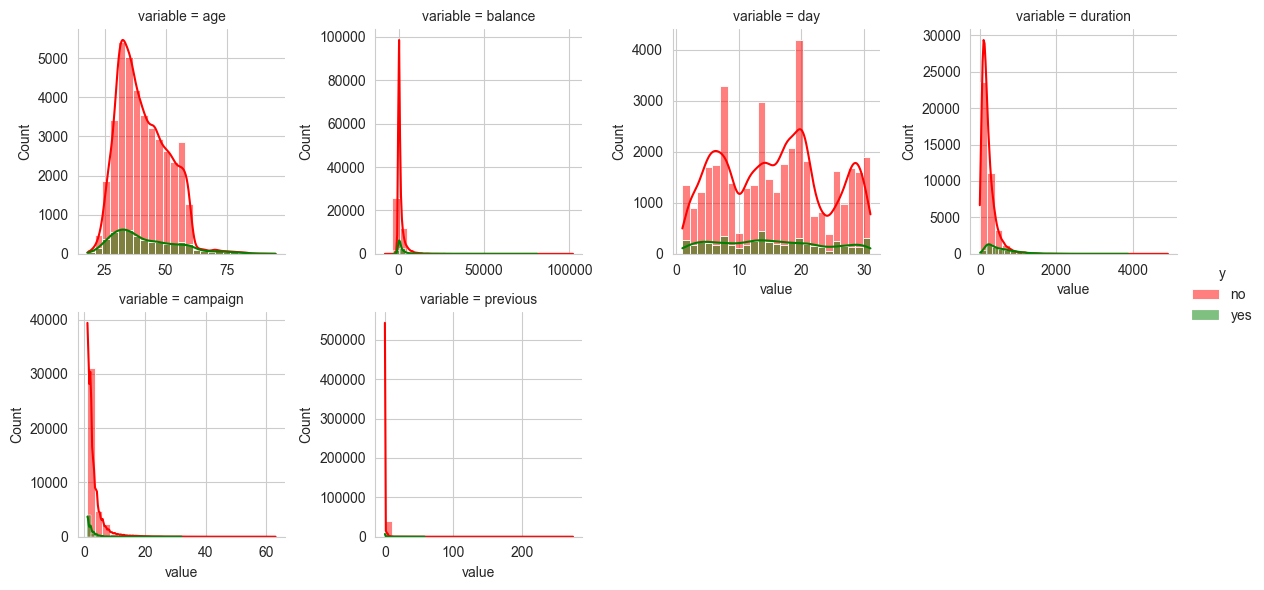

In [16]:
data_num = data_full.select_dtypes(include=['int64', 'float64'])

melt = pd.melt(data_full, id_vars='y', value_vars=data_num.columns)

g = sns.FacetGrid(melt, col="variable", hue="y", col_wrap=4, sharex=False, sharey=False, palette={'yes': 'green', 'no': 'red'})

g = g.map(sns.histplot, "value", bins=25, kde=True).add_legend()


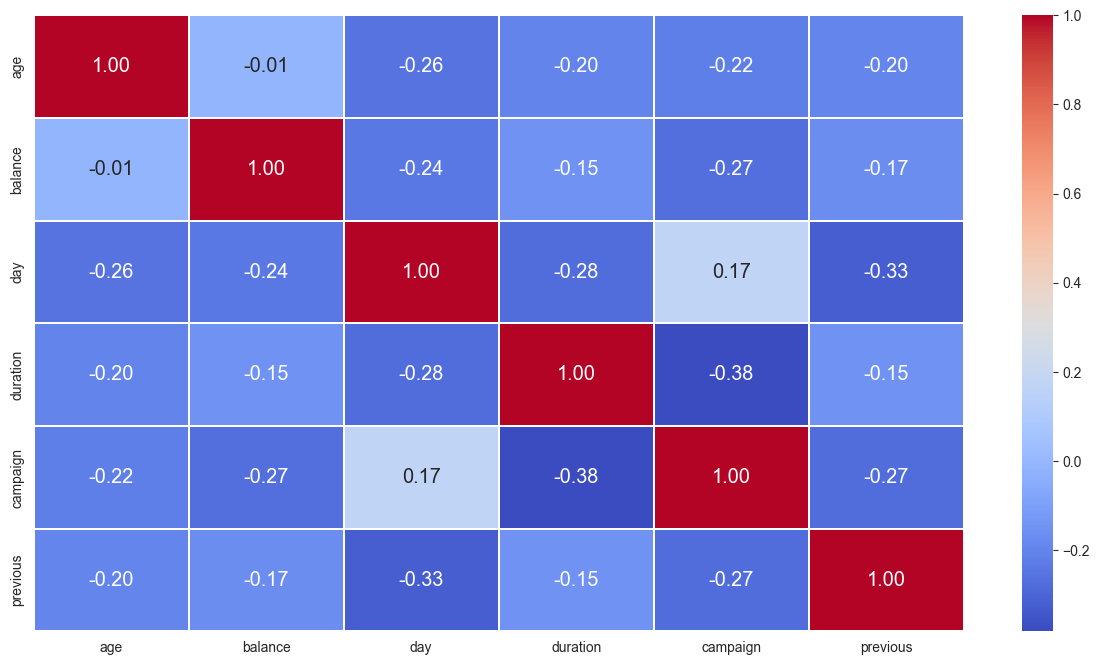

In [17]:
corr = data_full.select_dtypes(include=['int64', 'float64']).corr()

# Let's see the correlation between the numerical variables
# I will use the heatmap function from the seaborn library
# Select only numeric columns

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

# Pre-Processing Data

## Investigate the distribution of nominal features

We are going to check how many nominal, ordinal, continuous and discrete features there are in the dataset.

In [18]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        #print(f'{col} is a nominal feature')
        nominal += 1
    elif data_full[col].dtype == 'int64':
        #print(f'{col} is a discrete feature')
        discrete += 1
    elif data_full[col].dtype == 'float64':
    
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 10 nominal features, 0 ordinal features, 0 continuous features and 6 discrete features.


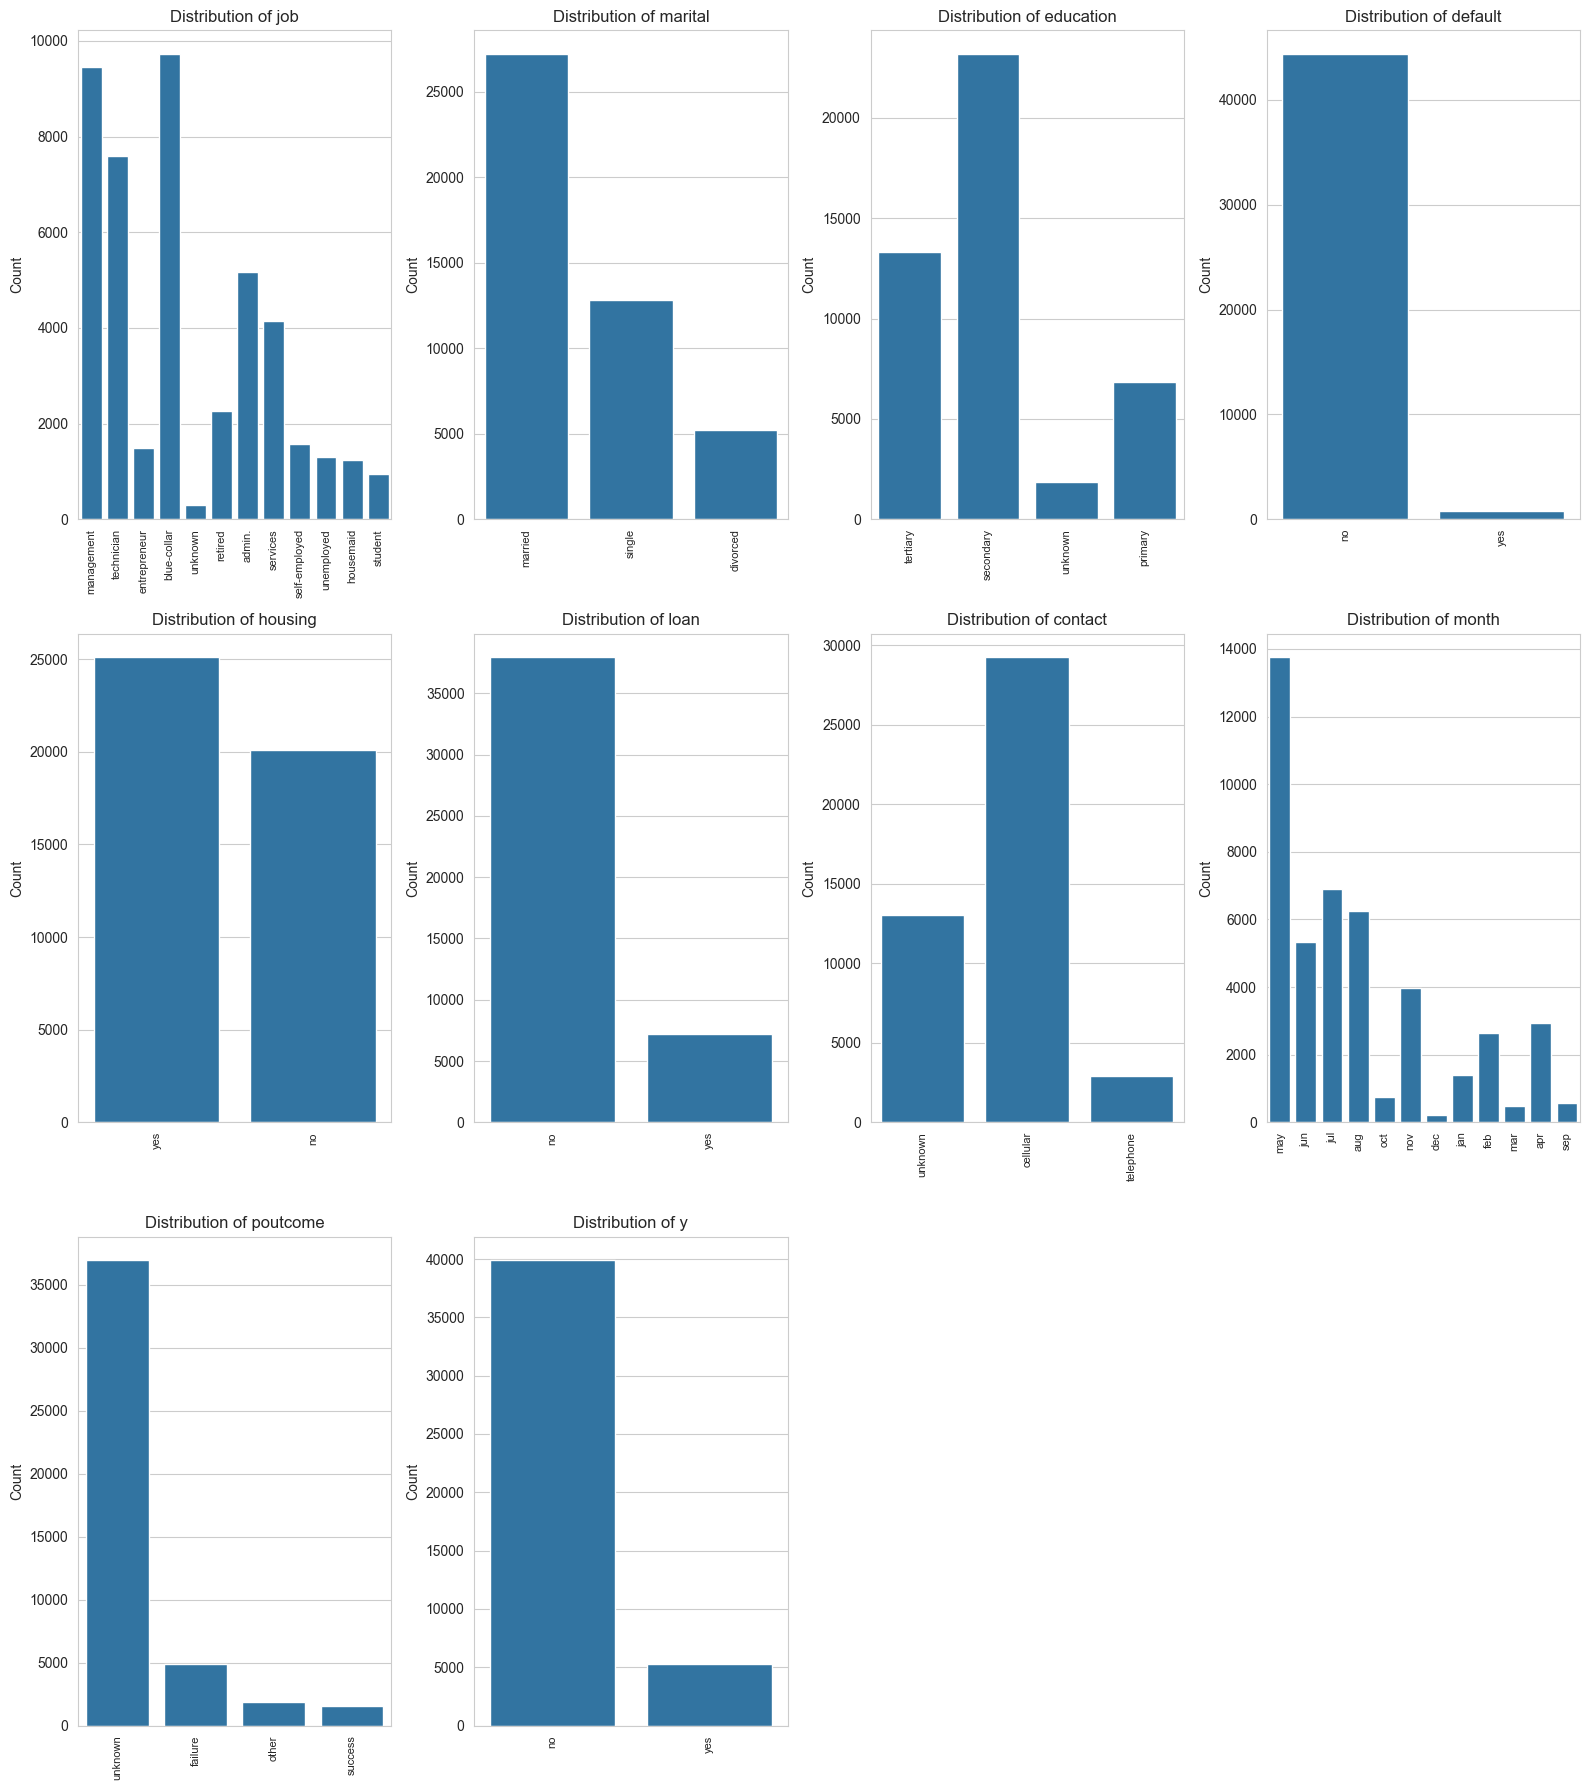

In [19]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

We do not have any ordinal features. So we can use the one-hot encoding method to encode the nominal features.

## One-hot encoding


In [20]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in data_full.select_dtypes(include=['object']).columns:
    print('-', i)
    # Creating a list with the nominal features, to use it later
    nominal_features.append(i)

The nominal features are:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- y


In [21]:
df_dummy = data_full.copy()
df_dummy = pd.get_dummies(data_full, columns=nominal_features)

# Checking the shape of the dataframe
print('The shape of the dataframe is:', data_full.shape[0], 'rows and', data_full.shape[1], 'features.')
print('The shape of the dataframe with dummy variables is:', df_dummy.shape[0], 'rows and',
    df_dummy.shape[1], 'features.')

The shape of the dataframe is: 45211 rows and 16 features.
The shape of the dataframe with dummy variables is: 45211 rows and 52 features.


In [22]:
df_dummy.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
3,47,1506,5,92,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
4,33,1,5,198,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False


In [23]:
df_dummy.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'], dtype=object)

Again we check for high correlation...

In [24]:
df_dummy.corr().abs()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.097783,0.009120,0.004648,0.004760,0.001288,0.055717,0.044002,0.021792,0.086650,0.023571,0.447378,0.008093,0.065780,0.197302,0.068632,0.000412,0.050200,0.164674,0.286257,0.427817,0.196182,0.093979,0.081629,0.069665,0.017879,0.017879,0.185513,0.185513,0.015655,0.015655,0.068375,0.170349,0.020132,0.028902,0.073844,0.022872,0.001198,0.007466,0.002902,0.051768,0.019499,0.127431,0.032775,0.060116,0.032418,0.004927,0.022967,0.035526,0.000816,0.025155,0.025155
balance,0.097783,1.000000,0.004503,0.021560,0.014578,0.016674,0.026726,0.048757,0.009642,0.001661,0.067797,0.046900,0.017850,0.038151,0.001233,0.016183,0.009023,0.010784,0.021732,0.025708,0.012537,0.015451,0.069937,0.084001,0.011181,0.066745,0.066745,0.068768,0.068768,0.084350,0.084350,0.015880,0.037999,0.037331,0.015593,0.008605,0.021594,0.003537,0.024421,0.064402,0.029566,0.023196,0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,0.030271,0.052838,0.052838
day,0.009120,0.004503,1.000000,0.030206,0.162490,0.051710,0.010455,0.022898,0.002312,0.003955,0.019021,0.010123,0.005062,0.006531,0.015894,0.032517,0.006382,0.011199,0.000433,0.007102,0.007412,0.019551,0.005831,0.021730,0.000114,0.009424,0.009424,0.027982,0.027982,0.011370,0.011370,0.020186,0.023652,0.034103,0.047805,0.030131,0.011368,0.283326,0.250523,0.147199,0.193807,0.020749,0.025066,0.096080,0.030514,0.053890,0.068700,0.032952,0.030321,0.086256,0.028348,0.028348
duration,0.004648,0.021560,0.030206,1.000000,0.084570,0.001203,0.015722,0.009637,0.001327,0.008046,0.008323,0.026032,0.007383,0.001427,0.006504,0.009176,0.020322,0.006390,0.006100,0.022683,0.020328,0.003660,0.002084,0.000891,0.000682,0.010021,0.010021,0.005075,0.005075,0.012412,0.012412,0.025543,0.023201,0.014379,0.040838,0.040054,0.019057,0.009557,0.006989,0.016163,0.021426,0.005519,0.007089,0.006041,0.015076,0.015077,0.018925,0.001958,0.042389,0.003491,0.394521,0.394521
campaign,0.004760,0.014578,0.162490,0.084570,1.000000,0.032855,0.021868,0.008986,0.002128,0.003097,0.016686,0.030913,0.005479,0.004671,0.021813,0.020739,0.018448,0.014091,0.015484,0.031371,0.023120,0.009616,0.020893,0.012866,0.005704,0.016822,0.016822,0.023599,0.023599,0.009980,0.009980,0.032271,0.053895,0.004853,0.068728,0.150378,0.012635,0.030747,0.063064,0.104148,0.043893,0.018612,0.067551,0.084697,0.051031,0.036718,0.088131,0.020107,0.057486,0.107965,0.073172,0.073172
previous,0.001288,0.016674,0.051710,0.001203,0.032855,1.000000,0.014245,0.017095,0.008181,0.015204,0.019579,0.005818,0.002371,0.010926,0.023556,0.001123,0.008504,0.009068,0.004534,0.012691,0.017006,0.016705,0.005603,0.022888,0.008257,0.018329,0.018329,0.037076,0.037076,0.011043,0.011043,0.131717,0.028097,0.154162,0.053985,0.052489,0.036628,0.065243,0.047004,0.082943,0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,0.532763,0.093236,0.093236
job_admin.,0.055717,0.026726,0.010455,0.015722,0.021868,0.014245,1.000000,0.188216,0.066273,0.060349,0.184835,0.082511,0.068364,0.114309,0.052308,0.161505,0.061907,0.028774,0.033624,0.059572,0.040912,0.111364,0.217639,0.144780,0.014495,0.010037,0.010037,0.043046,0.043046,0.030781,0.030781,0.000660,0.012291,0.005961,0.019374,0.071192,0.001495,0.003261,0.007026,0.015926,0.004495,0.013225,0.026657,0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,0.025940,0.005637,0.005637
job_blue-collar,0.0440

We need to extract the top 10 correlated pairs of features in order to drop them...



In [25]:
corr = df_dummy.corr() #df_dummy is the dataframe with the dummy variables
# we set the diagonal to zero
for i in range(len(corr)):
    corr.iloc[i,i] = 0  # we do not want to consider the self correlation among the variables


top_corr = corr.abs().unstack().sort_values(ascending=False) #trasforma un DataFrame o una Serie con un indice MultiLivello in un nuovo DataFrame con un indice meno annidato.
top_corr = top_corr[top_corr > 0.60]
top_corr

y_no                 y_yes                  1.000000
y_yes                y_no                   1.000000
default_yes          default_no             1.000000
default_no           default_yes            1.000000
loan_no              loan_yes               1.000000
housing_yes          housing_no             1.000000
housing_no           housing_yes            1.000000
loan_yes             loan_no                1.000000
contact_unknown      contact_cellular       0.862398
contact_cellular     contact_unknown        0.862398
marital_married      marital_single         0.772357
marital_single       marital_married        0.772357
poutcome_unknown     poutcome_failure       0.737932
poutcome_failure     poutcome_unknown       0.737932
education_secondary  education_tertiary     0.662890
education_tertiary   education_secondary    0.662890
dtype: float64

In [26]:
to_be_removed = [i[0] for i in top_corr.index]
to_be_removed = set(to_be_removed)-set(['y_no', 'y_yes']) #remove the pairs of features that are correlated
to_be_removed



{'contact_cellular',
 'contact_unknown',
 'default_no',
 'default_yes',
 'education_secondary',
 'education_tertiary',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'marital_married',
 'marital_single',
 'poutcome_failure',
 'poutcome_unknown'}

In [27]:
#and drop one of them
df_dummy = df_dummy.drop(to_be_removed, axis=1)
df_dummy.head(5)

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,education_unknown,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


# Model Training and Selection

## Data Creation

It's now time to build our vectorial representation and create all the splits (train/validation/test)

In [28]:
df_dummy



,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,education_unknown,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_no,y_yes
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45207,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45208,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
45209,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [29]:
X = df_dummy.drop(['y_no', 'y_yes'], axis='columns')
y = df_dummy[['y_no', 'y_yes']]


In [30]:
X

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,education_unknown,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,47,1506,5,92,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,33,1,5,198,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45207,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
45208,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
45209,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [31]:
y

,y_no,y_yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
45206,False,True
45207,False,True
45208,False,True
45209,True,False


In [32]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y,
                                                          test_size=0.20, random_state=4)

# we select 0.25 of the training set as validation (i.e. 20% on the total dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80,
                                                      test_size=0.25, random_state=1)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score # we use the F1 score since the dataset is unbalanced

#we should evaluate which hypermarameter we want to explore. For the KNR we have just a few:
#- n_neighbors -> 5 - 50
#- weights -> ‘uniform’, ‘distance’
# Have a look at the documentation to know more about this algorithm.

n_neighbors = np.linspace(5,50,10).astype('int32')
weights = ['uniform','distance']

models = []
val_errors = []
train_errors = []

for cur_n_neighbors in n_neighbors: #hyperparameters to explore
 for cur_weights in weights:
    model = Pipeline([('scaler', preprocessing.StandardScaler()), ('cla', KNeighborsClassifier(n_neighbors=cur_n_neighbors, weights=cur_weights))])
    model.fit(X_train,y_train)
    models.append(model)

   

# compute F1 SCORE on train and validation
    train_err = f1_score(y_true=y_train, y_pred=model.predict(X_train), average='macro')  # 'macro' average per gestire il dataset sbilanciato
    valid_err = f1_score(y_true=y_valid, y_pred=model.predict(X_valid), average='macro')

    print(">> %.3f  %.3f" % (train_err,valid_err))
    train_errors += [train_err]
    val_errors += [valid_err]

>> 0.764  0.676
>> 1.000  0.684
>> 0.688  0.640
>> 1.000  0.669
>> 0.688  0.652
>> 1.000  0.655
>> 0.663  0.635
>> 1.000  0.653
>> 0.668  0.642
>> 1.000  0.646
>> 0.649  0.635
>> 1.000  0.647
>> 0.651  0.631
>> 1.000  0.640
>> 0.640  0.623
>> 1.000  0.636
>> 0.646  0.631
>> 1.000  0.633
>> 0.634  0.621
>> 1.000  0.632


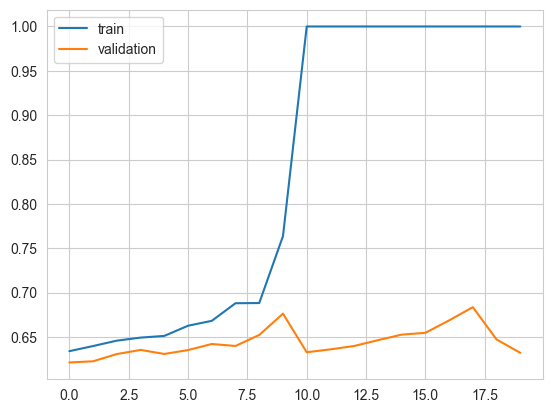

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [34]:
# plot validation vs test errors at increasing model complexity
idxs = np.argsort(train_errors) #we use the train errors as a measure of the model complexity

plt.figure()
plt.plot(np.asarray(train_errors)[idxs])
plt.plot(np.asarray(val_errors)[idxs])
plt.legend(['train','validation'])
# plt.xlabel('max leaves')
plt.show()

n_neighbors